**1. INTRODUCTION**

This notebook examines longitudinal stability and sex differences in chimpanzee personality by loading the study’s supplementary data, summarizing key features, and visualizing timepoint changes relevant to reported results on dominance, extraversion, agreeableness, and openness.​

Ratings were collected for the same individuals at T1 and T2 (10 years apart) across multiple traits on a seven‑point Likert scale, enabling paired comparisons and change analyses.

**2. RELATE RESEARCH QUESTIONS, DATA, AND FIGURES**

1. The researchers studied a group of chimpanzees and assessed their personality traits at two different time points, from adolescence to adulthood (T1 and T2; 10 years apart). Caretakers who were familiar with each chimpanzee rated them across several personality domains, including openness, agreeableness, dominance, reactivity, methodicalness, and extraversion. Each individual received numerical scores for these traits based on standardized rating scales called a seven-point Likert scale. The same tools used to measure personality in T1 were also used in T2. The study aimed to measure how stable personality traits are across time and whether there are sex differences in personality stability. In short, the 14 features of the 50 individual chimpanzee observations at two different timepoints are:

    1. ID (unique chimpanzee identifier)
    2. Sex (coded: 1 = male, 2 = female)
    3. T1 traits:
        1. T1 openness, T1 agreeableness, T1 reactivity, T1 methodical, T1 dominance, T1 extraversion
    4. T2 traits:
        1. T2 openness, T2 agreeableness, T2 reactivity, T2 methodical, T2 dominance, T2 extraversion
2. The data gives information about each individual chimpanzee’s behavior across time and for the different sexes. They want to measure whether there’s a change in personality after some time, in this case they measure the chimps 10 years apart. One other research question that can be answered is whether or not there is a correlation between personality factors for the chimps that did have a change in personality. Such as how strong is the correlation between dominance and extraversion versus agreeableness and methodicalness. If there were chimps in which dominance only increase but not extraversion, could have to do with their other personality factors?

3.	Description of the data
    1. There are 50 rows and 14 columns. The file gives the personality score of each chimpanzee at both timepoints.
    2. The data is formatted as separate columns. Each observation gives the ID, sex, and personality traits for both timepoints of each chimp.


**3. DATA CLEANING AND EXPLORATION**

Link to the data can be found here, in the "supplementary materials" tab, where it can be downloaded as an excel file: https://www.cambridge.org/core/journals/evolutionary-human-sciences/article/sex-differences-in-longitudinal-personality-stability-in-chimpanzees/6D94DE5CE1BBB5A9E14A21A9A212CFCA#article

No cleaning of the data is necessary. All the sexes are coded appropriately, each chimp is identifiable, and each personality score for both timepoints is graded as an absolute value. The data can be analyzed as is.

**ALGORITHM**

1.  Import the following libraries:
    1. pandas as pd
    2. numpy as np
    3. seaborn as sns
2.  After downloading the data file, use the read_excel function from the pandas library to read the file.
3.  Assign the number of rows and the number of columns to a variable.
4.  Print the shape of the dataframe and give a description of the rows and columns of the dataframe.
5.  Print the head of the dataframe.

In [24]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()  

# Read the data as an excel file and use the first column as the index
chimp = pd.read_excel('Rawlings_et_al_chimp_LT_personality_data.xlsx', index_col=0)

# Get the number of rows of the data frame using len() and .index
chimp_rows = len(chimp.index)
# Get the number of columns of the data using len() and .count()
chimp_columns = len(chimp.count())

# Print the shape of the dataframe and explain the what the rows and columns mean.
print("This is the shape of the data", chimp.shape, "\n", 
      "The data has", chimp_rows, "rows, which is the sex and personality measurement at each timepoint of each chimp.", "\n", 
      "And", chimp_columns, "rows, which is each observed chimp.") 

# Print the head of the dataframe
chimp.head()

This is the shape of the data (50, 13) 
 The data has 50 rows, which is the sex and personality measurement at each timepoint of each chimp. 
 And 13 rows, which is each observed chimp.


,Sex,T1 openness,T1 agreeableness,T1 reactivity,T1 methodical,T2 openness,T2 agreeableness,T2 methodical,T2 reactivity,T2 extraversion,T2 dominance,T1 dominance,T1 exterversion
ID,,,,,,,,,,,,,
1,1,4.74,4.76,3.91,4.79,4.30,4.50,4.65,2.84,4.35,5.41,4.93,5.09
2,2,5.49,4.63,3.69,5.00,5.59,5.28,5.00,3.01,4.87,3.99,4.37,4.46
3,2,4.03,3.81,3.21,4.35,3.93,4.75,4.45,2.30,3.90,3.58,3.47,3.91
4,2,4.55,4.85,3.87,4.97,4.75,5.10,4.10,2.41,4.27,4.50,3.66,4.68
5,1,4.53,4.50,3.93,4.57,4.03,4.00,4.50,3.10,4.92,4.80,4.19,4.59


**DESCRIPTION OF THE FEATURES**

Here I decided to observe agreeableness at T1 and T2. According to the study, agreeableness had the greatest change between the sexes. Therefore, I want to make sure it's consistent with the study across sex and time.

For both sexes at T1, I expect the mean and SD to be about the same or at least the distribution would be the same for both. At T2, the two sexes should have vastly different means and SDs.

**ALGORITHM**
1. Create a mask for filtering the dataframe based on sex.
2. Create two new dataframes, one for males and one for females.
3. Assign the summary of information of T1 and the mean and SD for both sexes to a variable.
4. Repeat step 3 for T2.
5. Print the summary information and the mean for both sexes across time.

In [35]:
# Filter for only male chimps
male_mask = chimp['Sex'] == 1
chimp_male = chimp[male_mask]

# Filter for only female chimps
chimp_female = chimp[~male_mask]

# Get the summary of T1 agreeableness for males
T1_summary_male = chimp_male["T1 agreeableness"].describe()
# Now get the mean and SD from the summary data
T1_mean_male = T1_summary_male.iloc[1]
T1_sd_male = T1_summary_male.iloc[2]

# Get the summary of T2 agreeableness for males
T2_summary_male = chimp_male["T2 agreeableness"].describe()
# Now get the mean and SD from the summary data
T2_mean_male = T2_summary_male.iloc[1]
T2_sd_male = T2_summary_male.iloc[2]

# Get the summary of T1 agreeableness for females
T1_summary_female = chimp_female["T1 agreeableness"].describe()
# Now get the mean and SD from the summary data
T1_mean_female = T1_summary_female.iloc[1]
T1_sd_female = T1_summary_female.iloc[2]

# Get the summary of T2 agreeableness for males
T2_summary_female = chimp_female["T2 agreeableness"].describe()
# Now get the mean and SD from the summary data
T2_mean_female = T2_summary_female.iloc[1]
T2_sd_female = T2_summary_female.iloc[2]

print("The summary for males at T1 is", "\n", T1_summary_male, "\n", "with an average of", T1_mean_male, "\n",
      "While for the females at T1 it's", "\n", T1_summary_female, "\n", "with an average of", T1_mean_female, "respectively")
print("The summary for males at T2 is", "\n", T2_summary_male, "\n", "with an average of", T2_mean_male, "\n",
      "While for the females at T2 it's", "\n", T2_summary_female, "\n", "with an average of", T2_mean_female, "respectively")

The summary for males at T1 is 
 count    25.000000
mean      4.253600
std       0.433713
min       3.450000
25%       3.920000
50%       4.340000
75%       4.530000
max       4.890000
Name: T1 agreeableness, dtype: float64 
 with an average of 4.2536000000000005 
 While for the females at T1 it's 
 count    25.000000
mean      4.391200
std       0.479925
min       3.190000
25%       4.220000
50%       4.500000
75%       4.700000
max       5.050000
Name: T1 agreeableness, dtype: float64 
 with an average of 4.3911999999999995 respectively
The summary for males at T2 is 
 count    25.000000
mean      3.776800
std       0.526638
min       2.800000
25%       3.400000
50%       3.750000
75%       4.050000
max       4.860000
Name: T2 agreeableness, dtype: float64 
 with an average of 3.7768 
 While for the females at T2 it's 
 count    25.000000
mean      4.442400
std       0.648629
min       3.180000
25%       3.950000
50%       4.400000
75%       4.900000
max       5.910000
Name: T2 agree

For both features, the number of observations is the same for each sex. Each had 25 observations across both timepoints for both males and females.

**VISUALIZATION OF THE FEATURES**

Visualizing the data this way will give us an understanding of what the researchers were trying to measure and understand for both groups, which is the change of personality across time for both males and females.

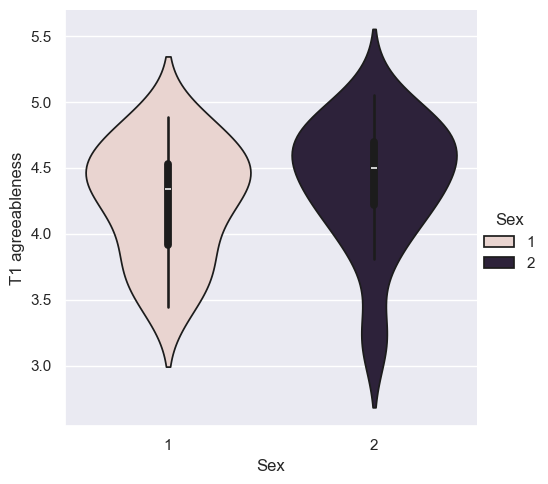

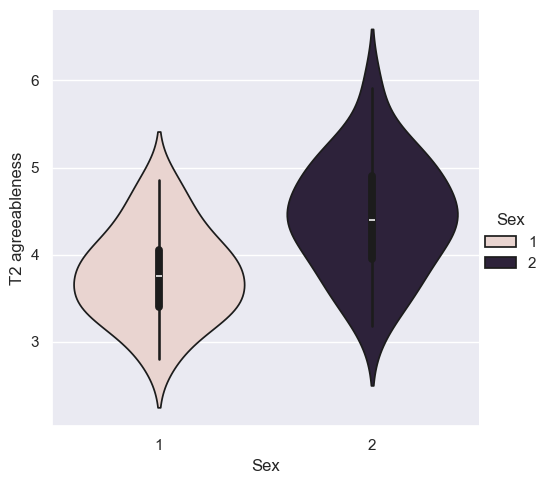

In [43]:
# The code below will make violin plots of agreeableness, where sex is the x-axis and agreeableness is the y-axis.
# Here I use catplot which we learned in notebook 17
sns.catplot(chimp, y = 'T1 agreeableness', x='Sex', hue='Sex', kind='violin') # The first will be agreeableness at T1
sns.catplot(chimp, y = 'T2 agreeableness', x='Sex', hue='Sex', kind='violin') # The first will be agreeableness at T2

Based on the plots above, it's clear that the values from the printed summaries do match with the plots. In T1, the means are 4.25 and 4.39 for both male and female, respectively. While at T2, it's 3.78 and 4.44 for both male and female. So there is a change in openess as the authors had hypothesized, where they predicted that female agreeableness would increase (which does occur a little bit here according to the distribution in T2), however they did not expect male agreeableness to decrease. However, the change isn't too drastic. Although the means are different, the distribution is very different from what the authors plotted in Figure 1, where they suggested a tighter SD for both sexes. Here, however, it's clear that the distributions overlap which does bring into question how the authors carried out their statistical analysis.

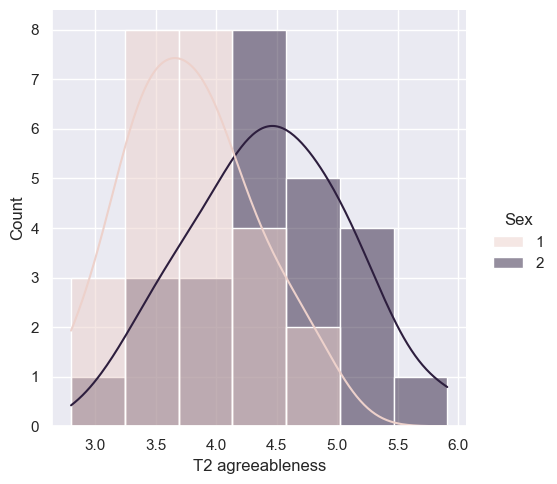

In [44]:
sns.displot(chimp, x='T2 agreeableness', hue='Sex', kde=True)